Introduction?? Heart Attack Prediction using Logistic Regression

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.mlab as mlab
%matplotlib inline

Data Preparation

In [37]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.0,2,66.0,136.0,110,80,1,1,0,0,1,0,21.948577
1,55.0,1,61.0,187.0,140,90,3,1,0,0,1,1,35.329481
2,52.0,1,65.0,141.0,130,70,3,1,0,0,0,1,23.461065
3,48.0,2,67.0,180.0,150,100,1,1,0,0,1,1,28.188906
4,48.0,1,61.0,123.0,100,60,1,1,0,0,0,0,23.238108


In [38]:
heart.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
BMI            0
dtype: int64

In [39]:
# Assign X (data) and y (target)
X = heart.drop("cardio", axis=1)
y = heart["cardio"]
print(X.shape, y.shape)

(68606, 12) (68606,)


In [40]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["gender", "cholesterol", "gluc", "smoke", "alco", "active"])
data_binary_encoded.head()

,age,height,weight,ap_hi,ap_lo,BMI,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,21.948577,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,35.329481,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,23.461065,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,28.188906,0,1,1,0,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,23.238108,1,0,1,0,0,1,0,0,1,0,1,0,1,0


Exploratory Analysis

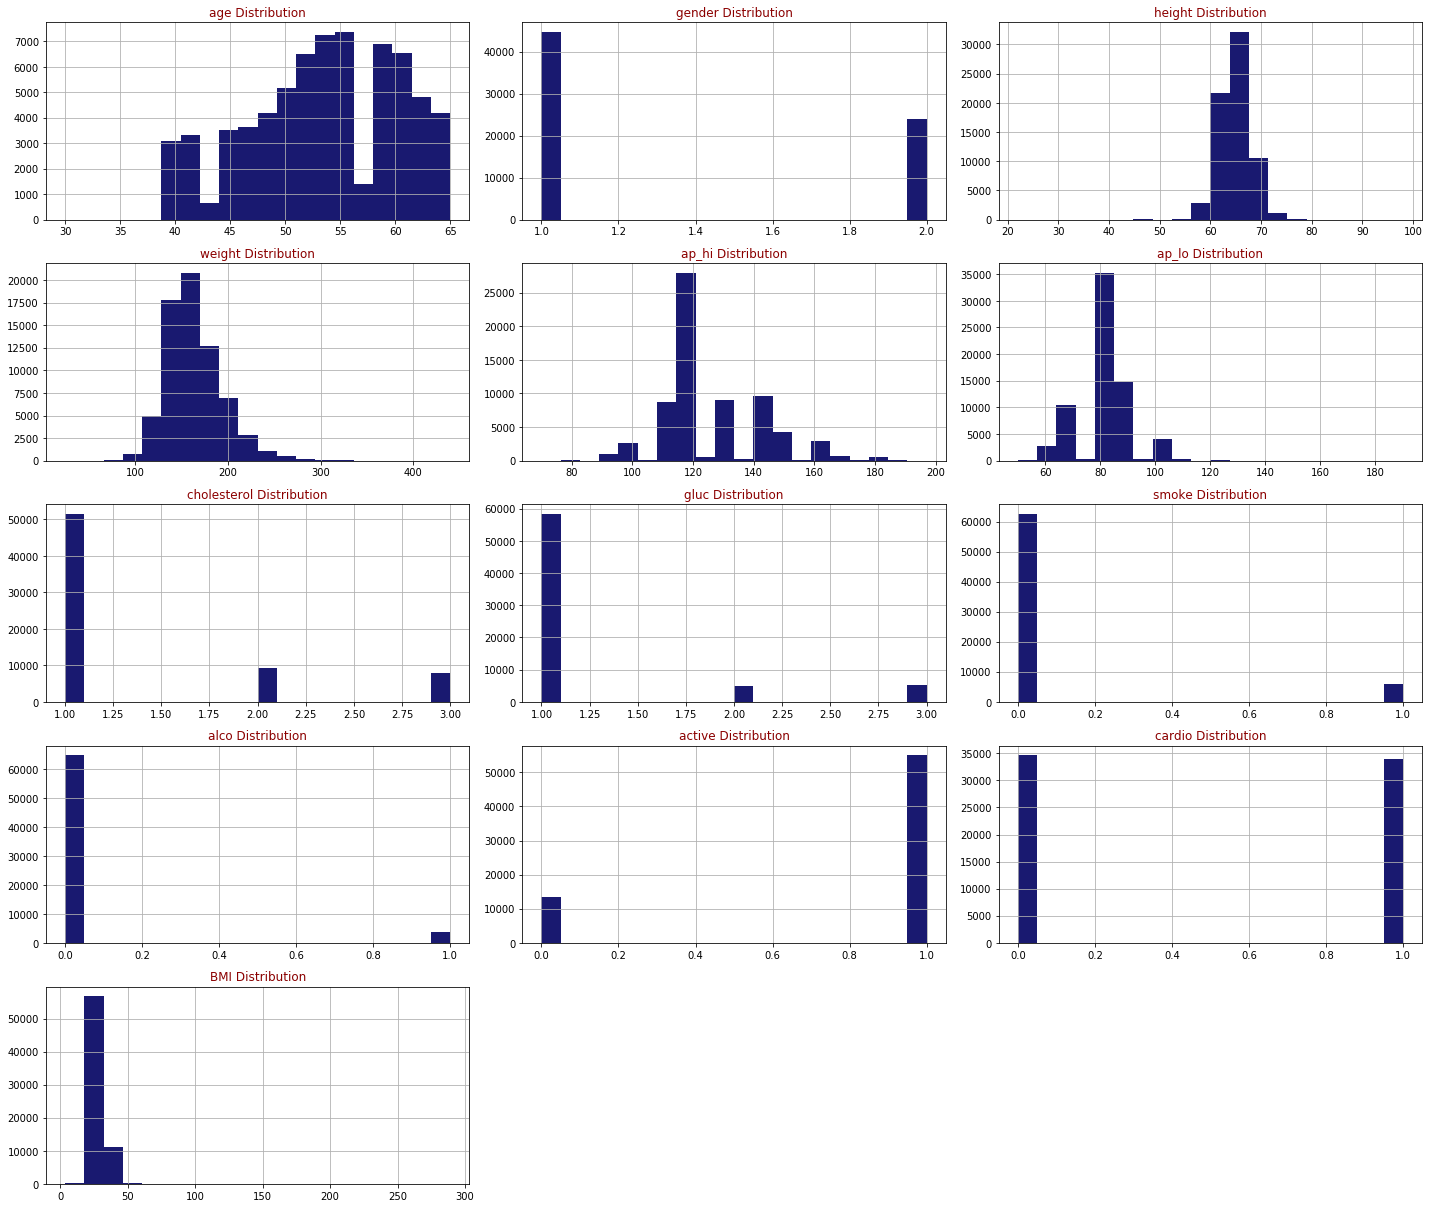

In [41]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart,heart.columns,6,3)

In [42]:
heart.cardio.value_counts()

0    34706
1    33900
Name: cardio, dtype: int64

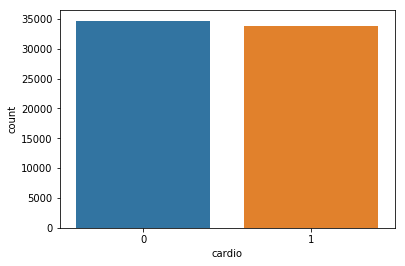

In [43]:
sn.countplot(x='cardio',data=heart)

There are 34,706 patents with no heart disease and 33,900 patients with risk of heart disease.

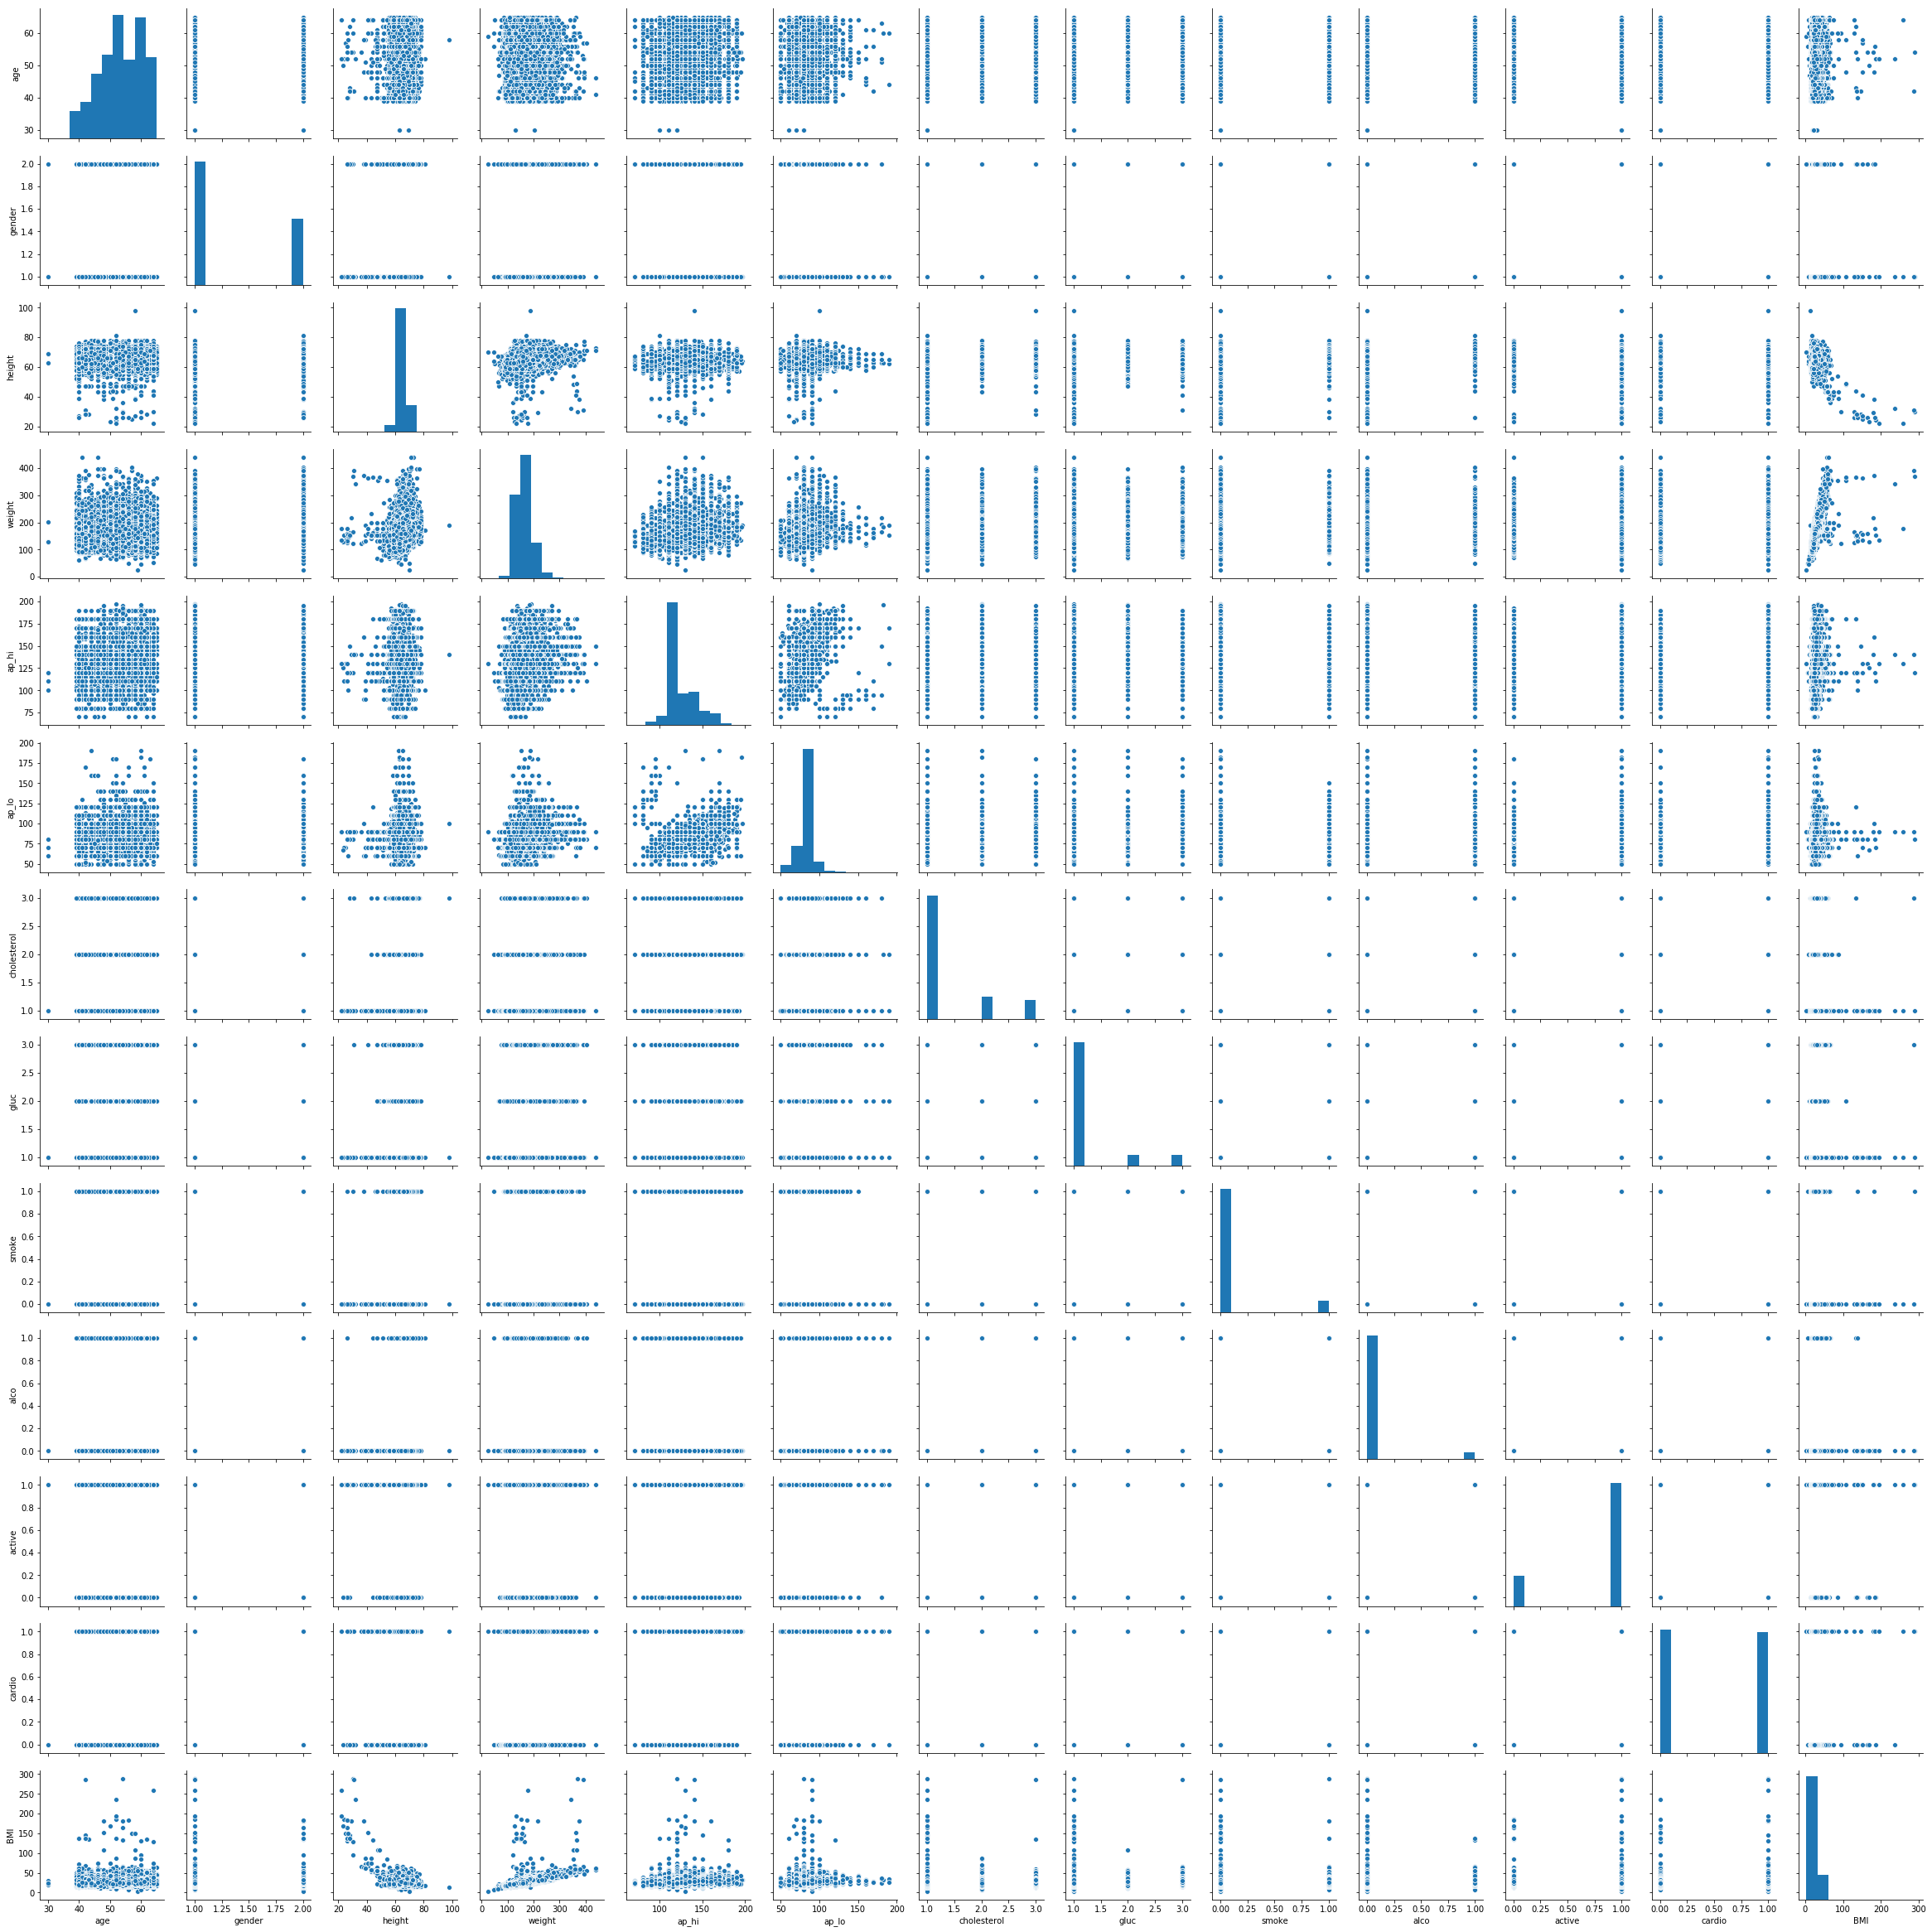

In [9]:
sn.pairplot(data=heart)

In [44]:
heart.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000
mean,53.323004,1.348483,64.743885,163.028540,126.443766,81.324753,1.364006,1.225490,0.087835,0.053494,0.803428,0.494126,27.429830
std,6.768762,0.476493,3.267133,31.470251,16.350238,9.519296,0.678516,0.571531,0.283057,0.225018,0.397409,0.499969,6.019838
min,30.000000,1.000000,22.000000,24.000000,70.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.443265
25%,48.000000,1.000000,63.000000,143.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.793846
50%,54.000000,1.000000,65.000000,158.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.283134
75%,58.000000,2.000000,67.000000,180.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.102509
max,65.000000,2.000000,98.000000,440.000000,197.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,289.011111


LOGISTIC REGRESSION
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [45]:
# Set up train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [46]:
# Set up classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
param_grid = dict(C=C, penalty=penalty)
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [48]:
classifier.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [49]:
classifier.get_params().values()

dict_values([1.0, None, False, True, 1, None, 100, 'warn', None, 'l2', None, 'warn', 0.0001, 0, False])

In [50]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=1.0, penalty=l1 ...............................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=1.0, penalty=l1, score=0.728, total=  16.4s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................... C=1.0, penalty=l1, score=0.725, total=  26.7s
[CV] C=1.0, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.0s remaining:    0.0s
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=1.0, penalty=l1, score=0.730, total=  15.7s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ................... C=1.0, penalty=l2, score=0.728, total=   1.1s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=1.0, penalty=l2, score=0.725, total=   1.0s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ................... C=1.0, penalty=l2, score=0.730, total=   1.1s
[CV] C=2.7825594022071245, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=2.7825594022071245, penalty=l1, score=0.729, total=  22.8s
[CV] C=2.7825594022071245, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=2.7825594022071245, penalty=l1, score=0.725, total=  19.1s
[CV] C=2.7825594022071245, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=2.7825594022071245, penalty=l1, score=0.730, total=  17.6s
[CV] C=2.7825594022071245, penalty=l2 ................................
[CV] .... C=2.7825594022071245, penalty=l2, score=0.728, total=   1.1s
[CV] C=2.7825594022071245, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=2.7825594022071245, penalty=l2, score=0.725, total=   1.2s
[CV] C=2.7825594022071245, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=2.7825594022071245, penalty=l2, score=0.730, total=   1.6s
[CV] C=7.742636826811269, penalty=l1 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=7.742636826811269, penalty=l1, score=0.729, total=  25.5s
[CV] C=7.742636826811269, penalty=l1 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=7.742636826811269, penalty=l1, score=0.725, total=  24.7s
[CV] C=7.742636826811269, penalty=l1 .................................
[CV] ..... C=7.742636826811269, penalty=l1, score=0.730, total=  26.2s
[CV] C=7.742636826811269, penalty=l2 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=7.742636826811269, penalty=l2, score=0.728, total=   0.9s
[CV] C=7.742636826811269, penalty=l2 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=7.742636826811269, penalty=l2, score=0.725, total=   1.2s
[CV] C=7.742636826811269, penalty=l2 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=7.742636826811269, penalty=l2, score=0.730, total=   0.9s
[CV] C=21.544346900318832, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=21.544346900318832, penalty=l1, score=0.728, total=  10.4s
[CV] C=21.544346900318832, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=21.544346900318832, penalty=l1, score=0.725, total=  18.1s
[CV] C=21.544346900318832, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=21.544346900318832, penalty=l1, score=0.730, total=  23.0s
[CV] C=21.544346900318832, penalty=l2 ................................
[CV] .... C=21.544346900318832, penalty=l2, score=0.729, total=   1.1s
[CV] C=21.544346900318832, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=21.544346900318832, penalty=l2, score=0.726, total=   1.1s
[CV] C=21.544346900318832, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=21.544346900318832, penalty=l2, score=0.730, total=   1.0s
[CV] C=59.94842503189409, penalty=l1 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=59.94842503189409, penalty=l1, score=0.729, total=  27.1s
[CV] C=59.94842503189409, penalty=l1 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=59.94842503189409, penalty=l1, score=0.725, total=  23.1s
[CV] C=59.94842503189409, penalty=l1 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=59.94842503189409, penalty=l1, score=0.730, total=  14.9s
[CV] C=59.94842503189409, penalty=l2 .................................
[CV] ..... C=59.94842503189409, penalty=l2, score=0.729, total=   1.2s
[CV] C=59.94842503189409, penalty=l2 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=59.94842503189409, penalty=l2, score=0.725, total=   1.1s
[CV] C=59.94842503189409, penalty=l2 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=59.94842503189409, penalty=l2, score=0.730, total=   1.0s
[CV] C=166.81005372000593, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=166.81005372000593, penalty=l1, score=0.729, total=  18.1s
[CV] C=166.81005372000593, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=166.81005372000593, penalty=l1, score=0.725, total=  24.5s
[CV] C=166.81005372000593, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=166.81005372000593, penalty=l1, score=0.730, total=  25.1s
[CV] C=166.81005372000593, penalty=l2 ................................
[CV] .... C=166.81005372000593, penalty=l2, score=0.729, total=   1.2s
[CV] C=166.81005372000593, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=166.81005372000593, penalty=l2, score=0.726, total=   1.1s
[CV] C=166.81005372000593, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=166.81005372000593, penalty=l2, score=0.730, total=   1.1s
[CV] C=464.15888336127773, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=464.15888336127773, penalty=l1, score=0.729, total=  24.3s
[CV] C=464.15888336127773, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=464.15888336127773, penalty=l1, score=0.725, total=  26.4s
[CV] C=464.15888336127773, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=464.15888336127773, penalty=l1, score=0.730, total=  21.8s
[CV] C=464.15888336127773, penalty=l2 ................................
[CV] .... C=464.15888336127773, penalty=l2, score=0.729, total=   1.1s
[CV] C=464.15888336127773, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=464.15888336127773, penalty=l2, score=0.725, total=   1.2s
[CV] C=464.15888336127773, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=464.15888336127773, penalty=l2, score=0.730, total=   1.1s
[CV] C=1291.5496650148827, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=1291.5496650148827, penalty=l1, score=0.729, total=  16.6s
[CV] C=1291.5496650148827, penalty=l1 ................................
[CV] .... C=1291.5496650148827, penalty=l1, score=0.725, total=  28.5s
[CV] C=1291.5496650148827, penalty=l1 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=1291.5496650148827, penalty=l1, score=0.730, total=  18.2s
[CV] C=1291.5496650148827, penalty=l2 ................................
[CV] .... C=1291.5496650148827, penalty=l2, score=0.729, total=   1.5s
[CV] C=1291.5496650148827, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=1291.5496650148827, penalty=l2, score=0.726, total=   1.3s
[CV] C=1291.5496650148827, penalty=l2 ................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] .... C=1291.5496650148827, penalty=l2, score=0.730, total=   1.2s
[CV] C=3593.813663804626, penalty=l1 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=3593.813663804626, penalty=l1, score=0.729, total=  24.7s
[CV] C=3593.813663804626, penalty=l1 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=3593.813663804626, penalty=l1, score=0.725, total=  18.4s
[CV] C=3593.813663804626, penalty=l1 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=3593.813663804626, penalty=l1, score=0.730, total=  18.4s
[CV] C=3593.813663804626, penalty=l2 .................................
[CV] ..... C=3593.813663804626, penalty=l2, score=0.729, total=   1.0s
[CV] C=3593.813663804626, penalty=l2 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=3593.813663804626, penalty=l2, score=0.725, total=   1.2s
[CV] C=3593.813663804626, penalty=l2 .................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ..... C=3593.813663804626, penalty=l2, score=0.730, total=   1.1s
[CV] C=10000.0, penalty=l1 ...........................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=10000.0, penalty=l1, score=0.729, total=  17.3s
[CV] C=10000.0, penalty=l1 ...........................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=10000.0, penalty=l1, score=0.725, total=  19.4s
[CV] C=10000.0, penalty=l1 ...........................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=10000.0, penalty=l1, score=0.730, total=  28.3s
[CV] C=10000.0, penalty=l2 ...........................................
[CV] ............... C=10000.0, penalty=l2, score=0.729, total=   1.1s
[CV] C=10000.0, penalty=l2 ...........................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=10000.0, penalty=l2, score=0.726, total=   1.2s
[CV] C=10000.0, penalty=l2 ...........................................


C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............... C=10000.0, penalty=l2, score=0.730, total=   1.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 11.3min finished
C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False

In [51]:
# Fit and Compare
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Data Score: 0.7279511796944844
Testing Data Score: 0.7237639925373134


In [52]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1291.5496650148827, 'penalty': 'l2'}


In [53]:
# List the best score
print(grid.best_score_)

0.7282232673844599


In [54]:
# Make Predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 0 0 0 0 0 0 1 0 1]
First 10 Actual labels: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [55]:
# Display Predictions
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,1,0


In [56]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["negative", "positive"]))

              precision    recall  f1-score   support

    negative       0.71      0.78      0.74      8677
    positive       0.75      0.67      0.71      8475

    accuracy                           0.72     17152
   macro avg       0.73      0.72      0.72     17152
weighted avg       0.73      0.72      0.72     17152



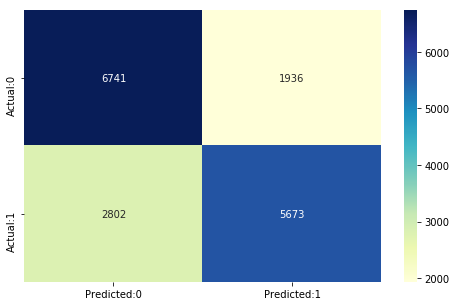

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 6741+5673 = 12,414 correct predictions and 2802+1936= 4738 incorrect ones.

True Positives: 5673

True Negatives: 6741

False Positives: 1936 (Type I error)

False Negatives: 2802 ( Type II error)

In [58]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [59]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7237639925373134 
 The Missclassification = 1-Accuracy =  0.2762360074626866 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.6693805309734513 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.7768814106257923 
 Positive Predictive value = TP/(TP+FP) =  0.7455644631357603 
 Negative predictive Value = TN/(TN+FN) =  0.7063816409933983 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.000110985153221 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.42557263503090986


From the above statistics it is clear that the model is highly sensitive than specific. The positive values are predicted more accurately than the negative.

In [60]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\drdin\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Predicted probabilities of 0 (No Heart Attack) and 1 ( Heart Attack: Yes) for the test data with a default classification threshold of 0.5

In [61]:
y_pred_prob=logreg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no Heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no Heart disease (0),Prob of Heart Disease (1)
0,0.139847,0.860153
1,0.719388,0.280612
2,0.574122,0.425878
3,0.570835,0.429165
4,0.670250,0.329750


Lower the Threshold

In [62]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[ 387 8290]
 [  52 8423]] 
 with 8810 correct predictions and 52 Type II errors( False Negatives) 

 Sensitivity:  0.9938643067846608 Specificity:  0.04460066843379048 



With 0.2 threshold the Confusion Matrix is  
 [[1563 7114]
 [ 263 8212]] 
 with 9775 correct predictions and 263 Type II errors( False Negatives) 

 Sensitivity:  0.9689675516224189 Specificity:  0.18013138181399102 



With 0.3 threshold the Confusion Matrix is  
 [[3371 5306]
 [ 821 7654]] 
 with 11025 correct predictions and 821 Type II errors( False Negatives) 

 Sensitivity:  0.9031268436578171 Specificity:  0.38849832891552377 



With 0.4 threshold the Confusion Matrix is  
 [[5326 3351]
 [1703 6772]] 
 with 12098 correct predictions and 1703 Type II errors( False Negatives) 

 Sensitivity:  0.7990560471976401 Specificity:  0.6138066151895817 





ROC CURVE

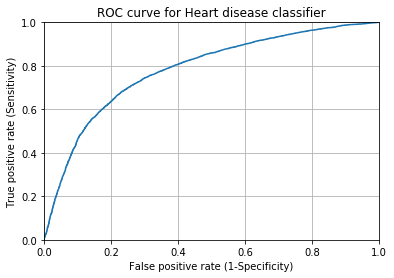

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives / total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

Area Under The Curve (AUC)
The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

In [64]:
from sklearn.metrics import roc_auc_score


In [66]:
score = roc_auc_score(y_test,y_pred_prob_yes[:,1])
score

0.7833809042520099

Key facts (https://www.who.int/en/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))

CVDs are the number 1 cause of death globally: more people die annually from CVDs than from any other cause.
An estimated 17.9 million people died from CVDs in 2016, representing 31% of all global deaths. Of these deaths, 85% are due to heart attack and stroke.
Over three quarters of CVD deaths take place in low- and middle-income countries.
Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2015, 82% are in low- and middle-income countries, and 37% are caused by CVDs.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management using counselling and medicines, as appropriate.

What are the risk factors for cardiovascular disease?

The most important behavioural risk factors of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol. The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity. These “intermediate risks factors” can be measured in primary care facilities and indicate an increased risk of developing a heart attack, stroke, heart failure and other complications.

Cessation of tobacco use, reduction of salt in the diet, consuming fruits and vegetables, regular physical activity and avoiding harmful use of alcohol have been shown to reduce the risk of cardiovascular disease. In addition, drug treatment of diabetes, hypertension and high blood lipids may be necessary to reduce cardiovascular risk and prevent heart attacks and strokes. Health policies that create conducive environments for making healthy choices affordable and available are essential for motivating people to adopt and sustain healthy behaviour.

There are also a number of underlying determinants of CVDs or "the causes of the causes". These are a reflection of the major forces driving social, economic and cultural change – globalization, urbanization and population ageing. Other determinants of CVDs include poverty, stress and hereditary factors.

In [ ]:
https://theweek.com/speedreads-amp/879051/new-study-likely-intensify-debate-among-cardiologists (Game Changer)